In [3]:
# Aplicacao_de_Machine_Learning_em_perfis_LWD
# Predicao de Gamma Ray e Fator Fotoelétrico
# Marcio Albuquerque Silveira
# Notebook para abrir arquivos las dos poços, modificar nomes de colunas, agrupar 

import lasio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import seaborn as sns
import math
import missingno as msno

import sklearn as sk
from sklearn.metrics import r2_score

In [4]:
#Abrir arquivos e mudar nome de colunas

lasw1 = lasio.read('LASOut_W16.las')
lasw2 = lasio.read('LASOut_W22.las')

dfw1 = lasw1.df()
dfw2 = lasw2.df()

dfw1.columns = ['GR_LWD', 'caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_LWD','correcao_perfil_densidade_LWD',
              'GR_cabo','caliper_cabo','densidade_cabo','neutrons_cabo','fator_foto_cabo','correcao_perfil_densidade_cabo']

dfw2.columns = ['GR_LWD', 'caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_LWD','correcao_perfil_densidade_LWD',
              'GR_cabo','caliper_cabo','densidade_cabo','neutrons_cabo','fator_foto_cabo','correcao_perfil_densidade_cabo']

#Profundidade 
#GR (LWD) 
#Caliper (LWD) 
#Densidade (LWD) 
#Nêutrons (LWD) 
#Fator fotoelétrico (LWD) 
#Correção do perfil de densidade (LWD) 
#GR (cabo) 
#Caliper (cabo) 
#Densidade (cabo) 
#Nêutrons (cabo) 
#Fator fotoelétrico (cabo) 
#Correção do perfil de densidade (cabo)


In [5]:
dfw2.head()

,GR_LWD,caliper_LWD,densidade_LWD,neutrons_LWD,fator_foto_LWD,correcao_perfil_densidade_LWD,GR_cabo,caliper_cabo,densidade_cabo,neutrons_cabo,fator_foto_cabo,correcao_perfil_densidade_cabo
DEPTH,,,,,,,,,,,,
5750.0520,8.2892,12.2426,2.6173,0.1084,6.7715,0.0825,14.3608,12.1556,2.6075,0.0720,5.2246,0.0006
5750.2044,9.1104,12.2379,2.6246,0.1116,6.6224,0.0762,19.5799,12.1551,2.6162,0.0745,5.5280,-0.0007
5750.3568,11.1551,12.2400,2.6163,0.1176,6.5396,0.0688,21.6135,12.1543,2.6184,0.0809,5.7106,-0.0008
5750.5092,13.5017,12.2482,2.6035,0.1244,6.4844,0.0638,26.9686,12.1513,2.6258,0.1059,5.6623,0.0011
5750.6616,15.0764,12.2633,2.6010,0.1297,6.3837,0.0657,25.3885,12.1508,2.6286,0.1205,5.4706,0.0019


In [6]:
#incluir coluna poço e agrupar em um df

dfw1['poco'] = 'w1'
dfw2['poco'] = 'w2'
df_list = [dfw1,dfw2]
df = pd.concat(df_list, sort=True)
grouped = df.groupby('poco')

In [7]:
df.describe()

,GR_LWD,GR_cabo,caliper_LWD,caliper_cabo,correcao_perfil_densidade_LWD,correcao_perfil_densidade_cabo,densidade_LWD,densidade_cabo,fator_foto_LWD,fator_foto_cabo,neutrons_LWD,neutrons_cabo
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,21.796128,33.181441,12.344666,12.234690,0.058435,-0.000584,2.573736,2.581543,7.605335,4.717558,0.111052,0.101646
std,21.162163,24.440200,0.163809,0.107584,0.018862,0.006031,0.098749,0.097254,1.231314,0.526273,0.051351,0.062186
min,1.175100,5.857900,12.155300,12.128400,-0.021800,-0.019000,1.781100,1.819900,4.626900,2.727300,0.028300,-0.004500
25%,9.975300,19.909750,12.265400,12.152000,0.048900,-0.003500,2.518850,2.531950,6.323050,4.379250,0.076000,0.062600
50%,15.415200,25.990500,12.303400,12.196600,0.058200,-0.001200,2.585800,2.598600,8.021300,4.721200,0.103700,0.090400
75%,23.673750,35.636050,12.369000,12.286000,0.068200,0.001100,2.644700,2.651050,8.595050,5.059850,0.132600,0.125400
max,151.331400,181.864800,13.256200,12.909000,0.185100,0.071800,2.775500,2.785600,10.409000,7.470900,0.587000,1.118000


In [8]:
#criar df para LWD e cabo 
LWD = ['GR_LWD', 'caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_LWD','correcao_perfil_densidade_LWD']
cabo = ['GR_cabo','caliper_cabo','densidade_cabo','neutrons_cabo','fator_foto_cabo','correcao_perfil_densidade_cabo']

df_LWD = df[LWD]
df_cabo = df[cabo]

<AxesSubplot:>

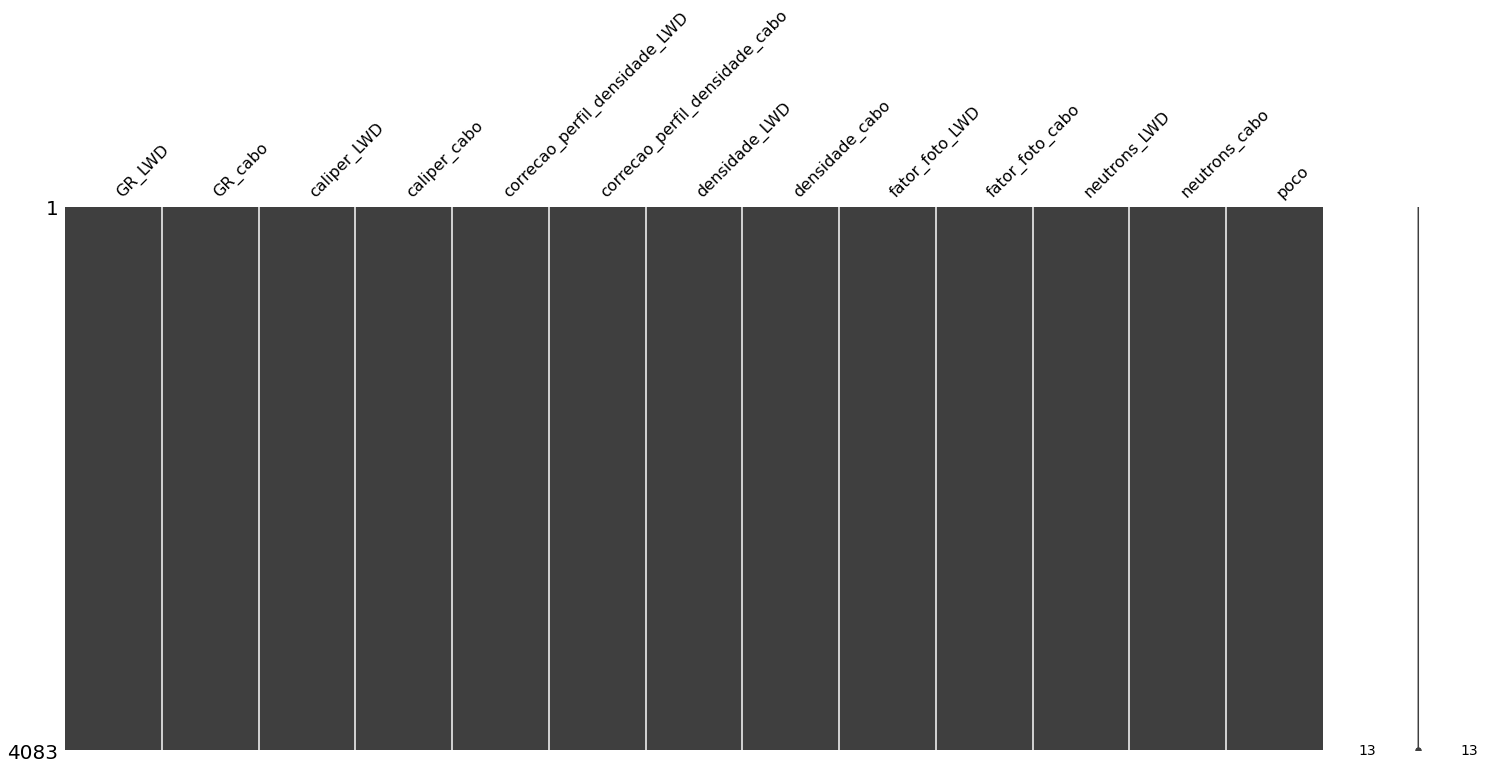

In [9]:
#Verificar se dados estão completos
msno.matrix(df)


In [10]:
#verificar se dados estão completos
df.isna().sum()

GR_LWD                            0
GR_cabo                           0
caliper_LWD                       0
caliper_cabo                      0
correcao_perfil_densidade_LWD     0
correcao_perfil_densidade_cabo    0
densidade_LWD                     0
densidade_cabo                    0
fator_foto_LWD                    0
fator_foto_cabo                   0
neutrons_LWD                      0
neutrons_cabo                     0
poco                              0
dtype: int64

In [11]:
# função para plotar perfis e comparar dois a dois

def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12,8))
    ax[0].plot(logs.GR_LWD, logs.Depth, color='green')
    ax[0].plot(logs.GR_cabo, logs.Depth, color='red')
    ax[1].plot(logs.caliper_cabo, logs.Depth, color='green')
    ax[1].plot(logs.caliper_LWD, logs.Depth, color='red')
    ax[2].plot(logs.densidade_cabo, logs.Depth, color='green')
    ax[2].plot(logs.densidade_LWD, logs.Depth, color='red')
    ax[3].plot(logs.neutrons_cabo, logs.Depth, color='green')
    ax[3].plot(logs.neutrons_LWD, logs.Depth, color='red')
    ax[4].plot(logs.fator_foto_cabo, logs.Depth, color='green')
    ax[4].plot(logs.fator_foto_LWD, logs.Depth, color='red')
    ax[5].plot(logs.correcao_perfil_densidade_cabo, logs.Depth, color='green')
    ax[5].plot(logs.correcao_perfil_densidade_LWD, logs.Depth, color='red')
    

    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR_LWD.min(),logs.GR_cabo.max())
    ax[0].set_ylabel("Depth")
    ax[1].set_xlabel("caliper")
    ax[1].set_xlim(logs.caliper_cabo.min(),logs.caliper_LWD.max())
    ax[2].set_xlabel("densidade")
    ax[2].set_xlim(logs.densidade_LWD.min(),logs.densidade_cabo.max())
    ax[3].set_xlabel("neutrons")
    ax[3].set_xlim(logs.neutrons_cabo.min(),logs.neutrons_cabo.max())
    ax[4].set_xlabel("fator fotoeletrico")
    ax[4].set_xlim(logs.fator_foto_cabo.min(),logs.fator_foto_LWD.max())
    ax[5].set_xlabel("corr. perfil dens")
    ax[5].set_xlim(logs.correcao_perfil_densidade_cabo.min(),logs.correcao_perfil_densidade_LWD.max())
    
#    f.suptitle('Well: XXX', fontsize=14,y=0.94)

In [12]:
#transformar profundidade em coluna para usar no plot em seguida
dfw1['Depth'] = dfw1.index
dfw2['Depth'] = dfw2.index

w1


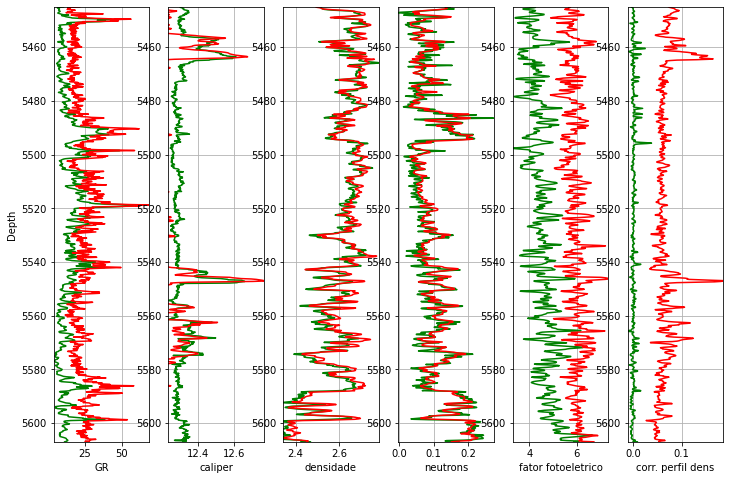

In [13]:
print ('w1')
log_plot(dfw1)

w22


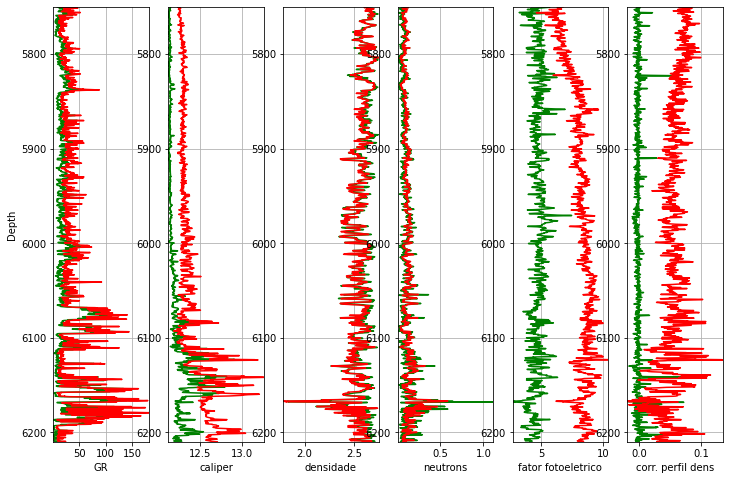

In [14]:
print ('w22')
log_plot(dfw2)

In [15]:
#fazendo MSE,r2 e grafico 45 graus para os parâmetros Gamma Ray e Fator foto elétrico

In [16]:
#MSE GR

mse_gr = sk.metrics.mean_squared_error(df.GR_cabo,df.GR_LWD)
print('MSE GR',mse_gr)

mse_grw1 = sk.metrics.mean_squared_error(dfw1.GR_cabo,dfw1.GR_LWD)
print('MSE GR - w1',mse_grw1)

mse_grw2 = sk.metrics.mean_squared_error(dfw2.GR_cabo,dfw2.GR_LWD)
print('MSE GR - w2',mse_grw2)


MSE GR 218.40915034891012
MSE GR - w1 124.22794543779135
MSE GR - w2 251.60186383861875


In [18]:
#R2 Gamma Ray
print('R2 GR',r2_score(df.GR_cabo, df.GR_LWD))
print('R2 GR - w1',r2_score(dfw1.GR_cabo, dfw1.GR_LWD))
print('R2 GR - w2',r2_score(dfw2.GR_cabo, dfw2.GR_LWD))


R2 GR 0.6342640240183103
R2 GR - w1 -0.8030717748633105
R2 GR - w2 0.6639889768444767


Text(0.5, 1.0, 'GR - Cabo x LWD')

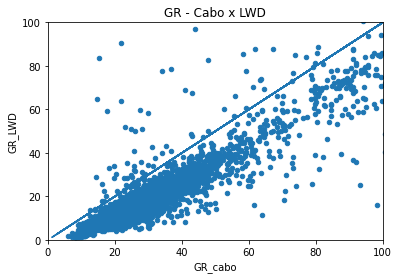

In [19]:

df.plot(kind='scatter', x='GR_cabo', y='GR_LWD',vmin=0, vmax=150)
plt.plot(df["GR_LWD"],df["GR_LWD"])
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("GR - Cabo x LWD")

Text(0.5, 1.0, 'GR - Cabo x LWD - comparativo poços')

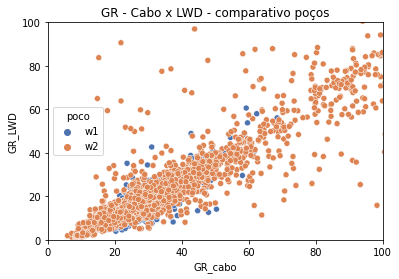

In [20]:
# scatterplot com sns
sns.scatterplot(x="GR_cabo", y="GR_LWD", hue ='poco',palette="deep", data=df)
#sns.scatterplot(x="GR_LWD", y="GR_LWD", data=df)

plt.ylim(0,100)
plt.xlim(0,100)
plt.title("GR - Cabo x LWD - comparativo poços")
#plt.gca().invert_yaxis()

In [21]:
#MSE Fator foto eletrico

mse_fe = sk.metrics.mean_squared_error(df.fator_foto_cabo,df.fator_foto_LWD)
print('MSE FE',mse_fe)

mse_few1 = sk.metrics.mean_squared_error(dfw1.fator_foto_cabo,dfw1.fator_foto_LWD)
print('MSE FE - w1',mse_few1)

mse_few2 = sk.metrics.mean_squared_error(dfw2.fator_foto_cabo,dfw2.fator_foto_LWD)
print('MSE FE - w2',mse_few2)

MSE FE 9.652574401900564
MSE FE - w1 2.1304299138909775
MSE FE - w2 12.303638242656511


# R2 Fator foto eletrico
print('R2 FE',r2_score(df.fator_foto_cabo, df.fator_foto_LWD))
print('R2 FE - w1',r2_score(dfw1.fator_foto_cabo, dfw1.fator_foto_LWD))
print('R2 FE - w2',r2_score(dfw2.fator_foto_cabo, dfw2.fator_foto_LWD))

Text(0.5, 1.0, 'FE - Cabo x LWD')

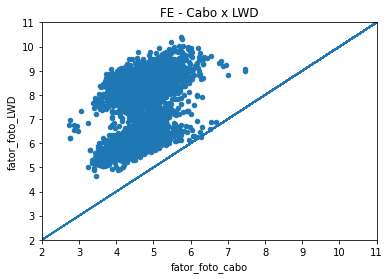

In [22]:
df.plot(kind='scatter', x='fator_foto_cabo', y='fator_foto_LWD',vmin=0, vmax=150)
plt.plot(df["GR_LWD"],df["GR_LWD"])
plt.xlim(2,11)
plt.ylim(2,11)
plt.title("FE - Cabo x LWD")

Text(0.5, 1.0, 'FE - Cabo x LWD - comparativo poços')

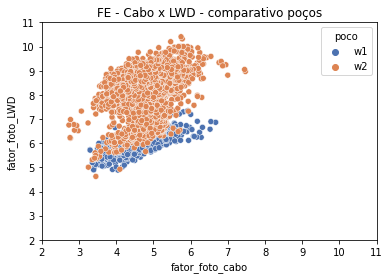

In [23]:
# scatterplot com sns
sns.scatterplot(x="fator_foto_cabo", y="fator_foto_LWD", hue ='poco',palette="deep", data=df)
#sns.scatterplot(x="GR_LWD", y="GR_LWD", data=df)

plt.ylim(2,11)
plt.xlim(2,11)
#plt.gca().invert_yaxis()
plt.title("FE - Cabo x LWD - comparativo poços")

In [24]:
#Correlacao de Spearman
df.corr(method ='spearman')

,GR_LWD,GR_cabo,caliper_LWD,caliper_cabo,correcao_perfil_densidade_LWD,correcao_perfil_densidade_cabo,densidade_LWD,densidade_cabo,fator_foto_LWD,fator_foto_cabo,neutrons_LWD,neutrons_cabo
GR_LWD,1.000000,0.901686,0.044243,-0.157447,-0.120776,-0.015694,0.179498,0.254759,0.165276,-0.165103,-0.146232,-0.178471
GR_cabo,0.901686,1.000000,0.028980,-0.159832,-0.170186,-0.050770,0.088096,0.159397,0.186024,-0.097341,-0.062664,-0.084424
caliper_LWD,0.044243,0.028980,1.000000,0.100610,-0.195861,-0.168999,-0.354624,-0.223724,0.622945,0.133340,0.243157,0.217155
caliper_cabo,-0.157447,-0.159832,0.100610,1.000000,0.020312,0.324736,0.008422,-0.048270,-0.095421,-0.163240,0.110551,0.135380
correcao_perfil_densidade_LWD,-0.120776,-0.170186,-0.195861,0.020312,1.000000,0.175132,0.445995,0.344424,-0.223770,-0.010846,-0.405345,-0.367722
correcao_perfil_densidade_cabo,-0.015694,-0.050770,-0.168999,0.324736,0.175132,1.000000,0.308554,0.321341,-0.231014,-0.088749,-0.228361,-0.216270
densidade_LWD,0.179498,0.088096,-0.354624,0.008422,0.445995,0.308554,1.000000,0.925861,-0.406659,-0.341203,-0.830451,-0.814061
densidade_cabo,0.254759,0.159397,-0.223724,-0.048270,0.344424,0.321341,0.925861,1.000000,-0.232254,-0.347197,-0.828047,-0.848040
fator_foto_LWD,0.165276,0.186024,0.622945,-0.095421,-0.223770,-0.231014,-0.406659,-0.232254,1.000000,0.382738,0.222324,0.197400
fator_foto_cabo,-0.165103,-0.097341,0.133340,-0.163240,-0.010846,-0.088749,-0.341203,-0.347197,0.382738,1.000000,0.188365,0.208469


In [25]:
df.describe()

,GR_LWD,GR_cabo,caliper_LWD,caliper_cabo,correcao_perfil_densidade_LWD,correcao_perfil_densidade_cabo,densidade_LWD,densidade_cabo,fator_foto_LWD,fator_foto_cabo,neutrons_LWD,neutrons_cabo
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,21.796128,33.181441,12.344666,12.234690,0.058435,-0.000584,2.573736,2.581543,7.605335,4.717558,0.111052,0.101646
std,21.162163,24.440200,0.163809,0.107584,0.018862,0.006031,0.098749,0.097254,1.231314,0.526273,0.051351,0.062186
min,1.175100,5.857900,12.155300,12.128400,-0.021800,-0.019000,1.781100,1.819900,4.626900,2.727300,0.028300,-0.004500
25%,9.975300,19.909750,12.265400,12.152000,0.048900,-0.003500,2.518850,2.531950,6.323050,4.379250,0.076000,0.062600
50%,15.415200,25.990500,12.303400,12.196600,0.058200,-0.001200,2.585800,2.598600,8.021300,4.721200,0.103700,0.090400
75%,23.673750,35.636050,12.369000,12.286000,0.068200,0.001100,2.644700,2.651050,8.595050,5.059850,0.132600,0.125400
max,151.331400,181.864800,13.256200,12.909000,0.185100,0.071800,2.775500,2.785600,10.409000,7.470900,0.587000,1.118000


Text(0.5, 1.0, 'GR - Cabo x LWD - KDE')

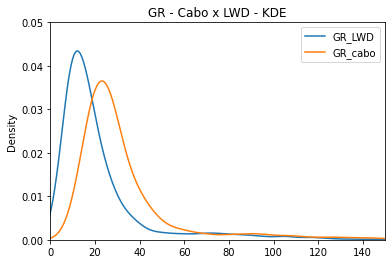

In [27]:
#Curvas KDE LWD x cabo GR

df.GR_LWD.plot(kind='kde')
df.GR_cabo.plot(kind='kde')
plt.xlim(0,150)
plt.ylim(0, 0.05) #ylim upper may change depending on data
plt.legend()
plt.title("GR - Cabo x LWD - KDE")

Text(0.5, 1.0, 'GR - Cabo x LWD - KDE')

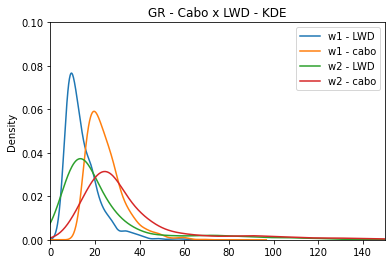

In [28]:
#Curvas KDE LWD x cabo GR (por poco)
dfw1.GR_LWD.plot(kind='kde',label='w1 - LWD')
dfw1.GR_cabo.plot(kind='kde',label='w1 - cabo')
dfw2.GR_LWD.plot(kind='kde',label='w2 - LWD')
dfw2.GR_cabo.plot(kind='kde',label='w2 - cabo')
plt.xlim(0,150)
plt.ylim(0, 0.1) #ylim upper may change depending on data
plt.legend()
plt.title("GR - Cabo x LWD - KDE")

Text(0.5, 1.0, 'FE - Cabo x LWD - KDE')

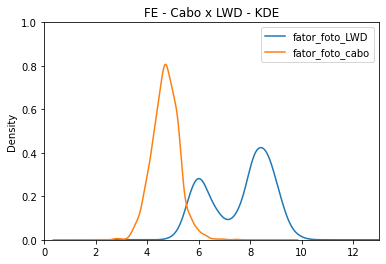

In [29]:
##Curvas KDE LWD x cabo FE

df.fator_foto_LWD.plot(kind='kde')
df.fator_foto_cabo.plot(kind='kde')
plt.xlim(0,13)
plt.ylim(0, 1) #ylim upper may change depending on data
plt.legend()
plt.title("FE - Cabo x LWD - KDE")

Text(0.5, 1.0, 'FE - Cabo x LWD - KDE')

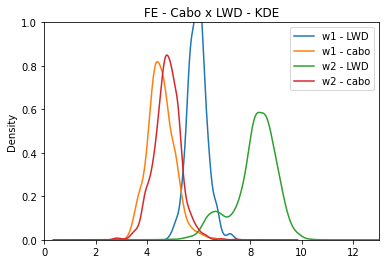

In [30]:
#Curvas KDE LWD x cabo FE (por poco)

dfw1.fator_foto_LWD.plot(kind='kde',label='w1 - LWD')
dfw1.fator_foto_cabo.plot(kind='kde',label='w1 - cabo')
dfw2.fator_foto_LWD.plot(kind='kde',label='w2 - LWD')
dfw2.fator_foto_cabo.plot(kind='kde',label='w2 - cabo')
plt.xlim(0,13)
plt.ylim(0, 1) #ylim upper may change depending on data
plt.legend()
plt.title("FE - Cabo x LWD - KDE")

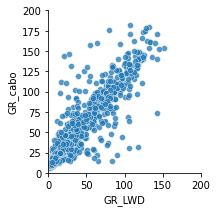

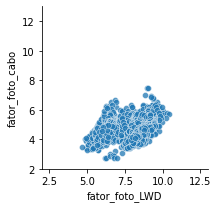

In [31]:
#fazendo de outra forma


g = sns.FacetGrid(df)
g.map(sns.scatterplot, 'GR_LWD', 'GR_cabo', alpha=0.75)
g.set(xlim=(0, 200))
g.set(ylim=(0, 200))

h = sns.FacetGrid(df)
h.map(sns.scatterplot, 'fator_foto_LWD', 'fator_foto_cabo', alpha=0.75)
h.set(xlim=(2, 13))
h.set(ylim=(2, 13))

In [32]:
df.describe()

,GR_LWD,GR_cabo,caliper_LWD,caliper_cabo,correcao_perfil_densidade_LWD,correcao_perfil_densidade_cabo,densidade_LWD,densidade_cabo,fator_foto_LWD,fator_foto_cabo,neutrons_LWD,neutrons_cabo
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,21.796128,33.181441,12.344666,12.234690,0.058435,-0.000584,2.573736,2.581543,7.605335,4.717558,0.111052,0.101646
std,21.162163,24.440200,0.163809,0.107584,0.018862,0.006031,0.098749,0.097254,1.231314,0.526273,0.051351,0.062186
min,1.175100,5.857900,12.155300,12.128400,-0.021800,-0.019000,1.781100,1.819900,4.626900,2.727300,0.028300,-0.004500
25%,9.975300,19.909750,12.265400,12.152000,0.048900,-0.003500,2.518850,2.531950,6.323050,4.379250,0.076000,0.062600
50%,15.415200,25.990500,12.303400,12.196600,0.058200,-0.001200,2.585800,2.598600,8.021300,4.721200,0.103700,0.090400
75%,23.673750,35.636050,12.369000,12.286000,0.068200,0.001100,2.644700,2.651050,8.595050,5.059850,0.132600,0.125400
max,151.331400,181.864800,13.256200,12.909000,0.185100,0.071800,2.775500,2.785600,10.409000,7.470900,0.587000,1.118000


In [33]:
#exportando arquivo 
#df_base sem escalonamento. Usado para gerar os alvos (GR e FE)
df.to_csv('df_base.csv')


<AxesSubplot:>

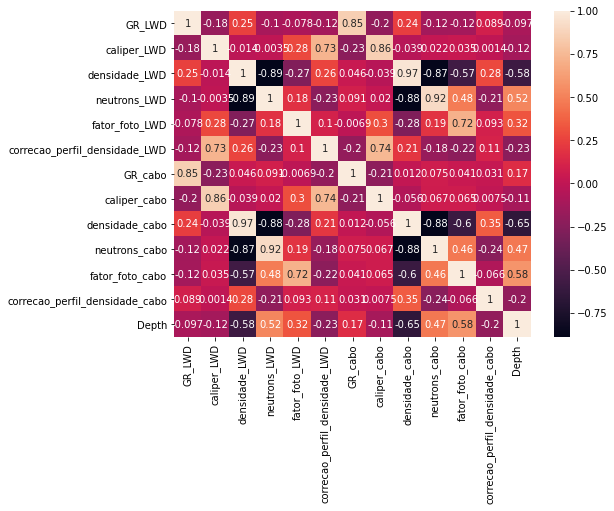

In [34]:
#grafico de corelação w1. Corrigir tamanho e avaliar parametros

corr = dfw1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

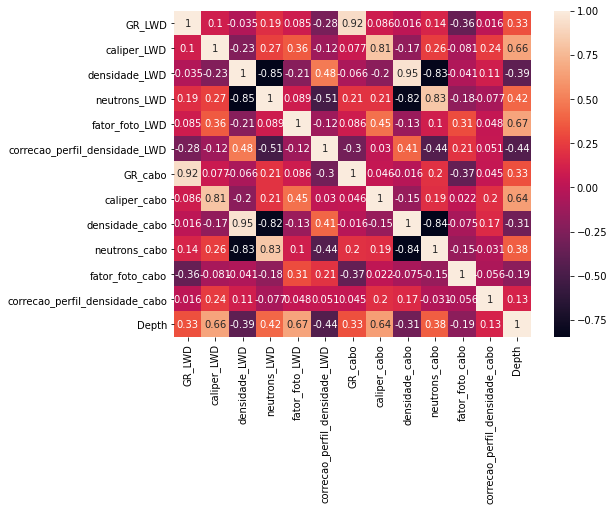

In [35]:
#grafico de corelação w2. Corrigir tamanho e avaliar parametros

corr = dfw2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [36]:
#Fazer escalonamento separadamente
from sklearn.preprocessing import StandardScaler

In [38]:
dfw1 = dfw1.drop("poco", axis = 1)
dfw2 = dfw2.drop("poco", axis = 1)

In [41]:
#Normalização dos dados Standard scaler

normalizer   = StandardScaler()

xw1 = dfw1.values
xw1_scaled = normalizer.fit_transform(xw1)
dfw1_scaled = pd.DataFrame(xw1_scaled)

xw2 = dfw2.values
xw2_scaled = normalizer.fit_transform(xw2)
dfw2_scaled = pd.DataFrame(xw2_scaled)



In [42]:
dfw1_scaled.columns = ['GR_LWD', 'caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_LWD','correcao_perfil_densidade_LWD',
              'GR_cabo','caliper_cabo','densidade_cabo','neutrons_cabo','fator_foto_cabo','correcao_perfil_densidade_cabo','Depth']

dfw2_scaled.columns = ['GR_LWD', 'caliper_LWD','densidade_LWD','neutrons_LWD','fator_foto_LWD','correcao_perfil_densidade_LWD',
              'GR_cabo','caliper_cabo','densidade_cabo','neutrons_cabo','fator_foto_cabo','correcao_perfil_densidade_cabo','Depth']

In [43]:
dfw1_scaled['poco'] = 'w1'
dfw2_scaled['poco'] = 'w2'
df_list = [dfw1_scaled,dfw2_scaled]
df = pd.concat(df_list, sort=True)

In [44]:
#exportando arquivo escalonado
df.to_csv('df.csv')

In [ ]:
# prossseguir para Notebook2